
## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |





In [4]:
pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 2.6 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 3.1 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


**Clean up the data**

Drop Null  --- dropna()


sex male female only ----- replace()


Standardize categories in region ---- .str.lower()


smoker column to bulian -----(col == 'yes)


Standardize the unit of data



In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [12]:
insurance.isna().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

In [13]:
insurance_filled=insurance.dropna()

In [15]:
insurance_filled.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
insurance_filled.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [17]:
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [18]:
insurance_filled['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [19]:
insurance_filled['region']=insurance_filled['region'].str.lower()

/var/folders/gg/cr5j8zfd0rn0jfs6967trdth0000gn/T/ipykernel_29501/694858374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['region']=insurance_filled['region'].str.lower()


In [20]:
insurance_filled['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [25]:
insurance_filled["sex"].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [29]:
Female='female'
Male='male'
sex_map={'woman': Female, 'F': Female, 'M': Male, 'man': Male}

In [30]:
insurance_filled['sex']=insurance['sex'].replace(sex_map)

/var/folders/gg/cr5j8zfd0rn0jfs6967trdth0000gn/T/ipykernel_29501/2105168264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['sex']=insurance['sex'].replace(sex_map)


In [31]:
insurance_filled['sex'].unique()

array(['female', 'male'], dtype=object)

In [32]:
insurance_filled['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [33]:
insurance_filled['smoker']=(insurance_filled['smoker']=='yes')

/var/folders/gg/cr5j8zfd0rn0jfs6967trdth0000gn/T/ipykernel_29501/3008530744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['smoker']=(insurance_filled['smoker']=='yes')


In [34]:
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: bool(1), float64(3), object(3)
memory usage: 67.2+ KB


In [22]:
#charges need to be in float

In [23]:
insurance_filled['charges']

0          16884.924
1          1725.5523
2          $4449.462
3       $21984.47061
4         $3866.8552
            ...     
1333     $10600.5483
1334       2205.9808
1335      $1629.8335
1336        2007.945
1337      29141.3603
Name: charges, Length: 1208, dtype: object

In [35]:
insurance_filled["charges"]=insurance_filled["charges"].str.strip('$').astype('float64')

/var/folders/gg/cr5j8zfd0rn0jfs6967trdth0000gn/T/ipykernel_29501/684200494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled["charges"]=insurance_filled["charges"].str.strip('$').astype('float64')


In [37]:
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB


In [40]:
insurance_filled.sample(10)

,age,sex,bmi,children,smoker,region,charges
13,56.0,female,39.820,0.0,False,southeast,11090.71780
1138,33.0,male,30.250,0.0,False,southeast,3704.35450
1030,46.0,female,23.655,1.0,True,northwest,21677.28345
1270,26.0,male,33.915,1.0,False,northwest,3292.52985
1164,41.0,female,28.310,1.0,False,northwest,7153.55390
1144,-50.0,male,32.300,2.0,False,southwest,9630.39700
297,47.0,male,25.410,-1.0,True,southeast,21978.67690
1226,38.0,male,16.815,2.0,False,northeast,6640.54485
1028,54.0,male,31.600,0.0,False,southwest,9850.43200
1326,42.0,female,32.870,0.0,False,northeast,7050.02130


In [41]:
#there are some negative values

In [42]:
insurance_pos =insurance_filled.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

In [44]:
insurance_pos.sample(10)

,age,sex,bmi,children,smoker,region,charges
1204,18.0,female,27.280,3.0,True,southeast,18223.45120
86,57.0,female,31.160,0.0,True,northwest,43578.93940
377,24.0,male,40.150,0.0,True,southeast,38126.24650
66,61.0,female,39.100,2.0,False,southwest,14235.07200
56,58.0,female,31.825,2.0,False,northeast,13607.36875
159,50.0,female,27.830,3.0,False,southeast,19749.38338
1207,36.0,male,33.400,2.0,True,southwest,38415.47400
1332,52.0,female,44.700,3.0,False,southwest,11411.68500
912,59.0,female,26.695,3.0,False,northwest,14382.70905
862,55.0,female,33.535,2.0,False,northwest,12269.68865


In [45]:
insurance_pos.to_csv('cleaned_data.csv')

Scatter plot of the data

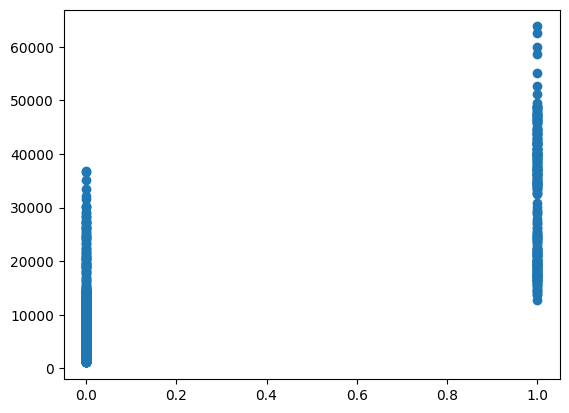

In [57]:
import matplotlib.pyplot as plt
df= insurance_pos.copy()
plt.scatter(df['smoker'], df['charges'])

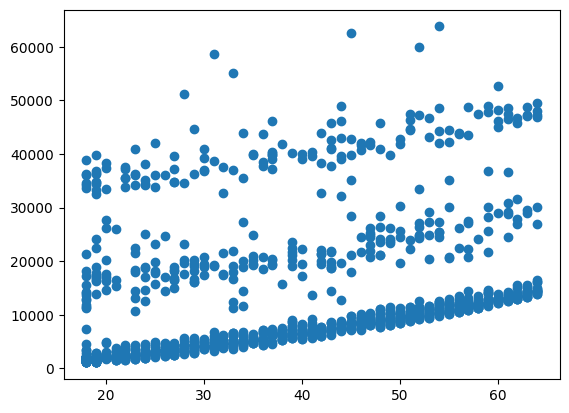

In [48]:
plt.scatter(df['age'], df['charges'])

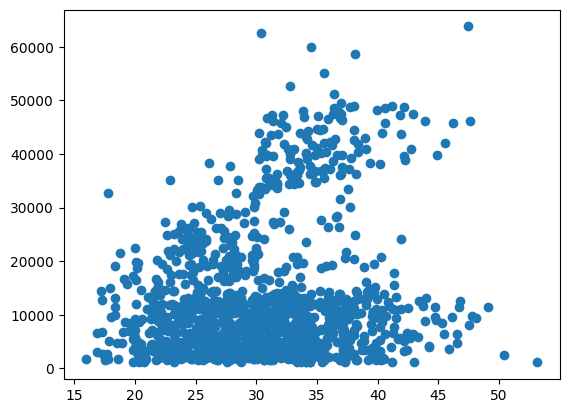

In [54]:
plt.scatter(df['bmi'], df['charges'])

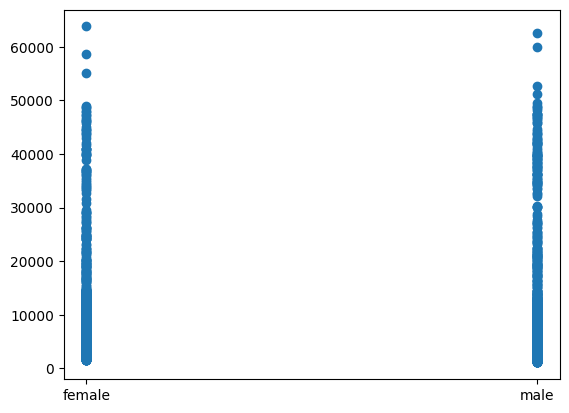

In [51]:
plt.scatter(df['sex'], df['charges'])

In [55]:
#prepare data for linear regression

In [61]:
df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
df['region'].value_counts()


region
southeast    322
southwest    297
northeast    295
northwest    294
Name: count, dtype: int64

In [62]:
df_new = df_new.drop(columns=['region_southeast']) #standard practise is to drop the one dummy values that appears most frequently


In [63]:
df_new.sample(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
758,30.0,male,37.430,3.0,False,5428.72770,True,False,False
50,18.0,female,35.625,0.0,False,2211.13075,True,False,False
537,46.0,female,30.200,2.0,False,8825.08600,False,False,True
749,28.0,male,30.875,0.0,False,3062.50825,False,True,False
1144,50.0,male,32.300,2.0,False,9630.39700,False,False,True
848,27.0,female,24.100,0.0,False,2974.12600,False,False,True
635,64.0,male,38.190,0.0,False,14410.93210,True,False,False
837,56.0,female,28.310,0.0,False,11657.71890,True,False,False
991,38.0,female,27.835,2.0,False,7144.86265,True,False,False
228,41.0,female,31.635,1.0,False,7358.17565,True,False,False


In [64]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1208 non-null   float64
 1   sex               1208 non-null   object 
 2   bmi               1208 non-null   float64
 3   children          1208 non-null   float64
 4   smoker            1208 non-null   bool   
 5   charges           1207 non-null   float64
 6   region_northeast  1208 non-null   bool   
 7   region_northwest  1208 non-null   bool   
 8   region_southwest  1208 non-null   bool   
dtypes: bool(4), float64(4), object(1)
memory usage: 61.3+ KB


In [65]:
df_new['smoker'] = df_new['smoker'].astype('int64')

In [66]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1208 non-null   float64
 1   sex               1208 non-null   object 
 2   bmi               1208 non-null   float64
 3   children          1208 non-null   float64
 4   smoker            1208 non-null   int64  
 5   charges           1207 non-null   float64
 6   region_northeast  1208 non-null   bool   
 7   region_northwest  1208 non-null   bool   
 8   region_southwest  1208 non-null   bool   
dtypes: bool(3), float64(4), int64(1), object(1)
memory usage: 69.6+ KB


In [67]:
df_new.sample(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
332,61.0,female,31.160,0.0,0,13429.03540,False,True,False
56,58.0,female,31.825,2.0,0,13607.36875,True,False,False
1078,28.0,male,31.680,0.0,1,34672.14720,False,False,False
652,48.0,female,31.130,0.0,0,8280.62270,False,False,False
1076,47.0,female,32.000,1.0,0,8551.34700,False,False,True
929,41.0,male,34.210,1.0,0,6289.75490,False,False,False
1050,44.0,female,36.955,1.0,0,8023.13545,False,True,False
398,64.0,male,25.600,2.0,0,14988.43200,False,False,True
409,32.0,male,30.030,1.0,0,4074.45370,False,False,False
189,29.0,female,32.110,2.0,0,4922.91590,False,True,False


In [68]:
df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')

In [69]:
df_new = df_new.drop(columns=['sex'])

In [70]:
df_new = df_new.dropna()

In [71]:
df_new.head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,False,False,True,0
1,18.0,33.770,1.0,0,1725.55230,False,False,False,1
2,28.0,33.000,3.0,0,4449.46200,False,False,False,1
3,33.0,22.705,0.0,0,21984.47061,False,True,False,1
4,32.0,28.880,0.0,0,3866.85520,False,True,False,1


In [72]:
region_cols = ['region_northeast', 'region_northwest', 'region_southwest']


In [73]:
df_new[region_cols] = df_new[region_cols].astype('int64')


In [74]:
df_new.sample(10)

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
138,54.0,31.900,3.0,0,27322.73386,0,0,0,0
959,48.0,36.670,1.0,0,28468.91901,0,1,0,1
271,50.0,34.200,2.0,1,42856.83800,0,0,1,1
1266,55.0,30.500,0.0,0,10704.47000,0,0,1,0
176,38.0,27.835,2.0,0,6455.86265,0,1,0,1
902,26.0,27.265,3.0,0,4661.28635,1,0,0,1
975,29.0,22.895,0.0,1,16138.76205,1,0,0,1
1050,44.0,36.955,1.0,0,8023.13545,0,1,0,0
531,62.0,31.730,0.0,0,14043.47670,1,0,0,0
378,64.0,30.115,3.0,0,16455.70785,0,1,0,0


In [76]:
#fit a linear regression model using all cols except charges as input and try to predict charges as output

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score    

# Define input and output variables
X = df_new.drop(columns=['charges'])
y = df_new['charges']

print(df_new.info())
print(y.info())



<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1207 non-null   float64
 1   bmi               1207 non-null   float64
 2   children          1207 non-null   float64
 3   smoker            1207 non-null   int64  
 4   charges           1207 non-null   float64
 5   region_northeast  1207 non-null   int64  
 6   region_northwest  1207 non-null   int64  
 7   region_southwest  1207 non-null   int64  
 8   is_male           1207 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 94.3 KB
None
<class 'pandas.core.series.Series'>
Index: 1207 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1207 non-null   float64
dtypes: float64(1)
memory usage: 18.9 KB
None


In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R squared score
r2_score = r2_score(y_test, y_pred)

# Output the mean squared error
r2_score

0.7049323160872816

In [79]:
#how model performes in validation dataset

In [81]:
def preprocess_df(df):
    df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
    df_new = df_new.drop(columns=['region_southeast'])

    df_new['smoker'] = (df_new['smoker'] == 'yes')
    df_new['smoker'] = df_new['smoker'].astype('int64')

    df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
    df_new = df_new.drop(columns=['sex'])

    region_cols = ['region_northeast', 'region_northwest', 'region_southwest']
    df_new[region_cols] = df_new[region_cols].astype('int64')
    
    return df_new
    

In [82]:
val_df = pd.read_csv('validation_dataset.csv')
input_df = preprocess_df(val_df)

predictions = model.predict(input_df)

validation_data = val_df.copy()

validation_data['predicted_charges'] = predictions

validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

validation_data.head()



,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312


In [83]:
validation_data

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
5,70.0,female,72.958351,11.0,yes,southeast,58677.838443
6,29.0,female,32.110000,2.0,no,northwest,7044.405963
7,42.0,female,41.325000,1.0,no,northeast,13065.658004
8,48.0,female,36.575000,0.0,no,northwest,12665.703636
9,63.0,male,33.660000,3.0,no,southeast,16142.541083
